# Aulas 02 - Matplotlib

O matplotlib é uma biblioteca que permite graficar diversos tipos de representações diretamente a partir de arrays. Possui essencialmente todos os tipos de gráficos que estudamos na aula passada, mas com uma sintaxe diferente a do pandas, o que afetará não somente como plotamos as visualizações, mas, também, elementos "estéticos" associados a elas (como legendas, eixos e afins). 

A biblioteca do matplotlib define alguns **elementos básicos** a partir dos quais se estruturam todas as suas funções.

### Elementos básicos de uma figura com matplotlib

[Guia oficial do matplotlib](https://matplotlib.org/stable/tutorials/introductory/quick_start.html)

Na figura abaixo, temos definidos os **elementos básicos** mencionados acima. Eles servirão como parâmetros nas mais variadas funções da biblioteca.

<img src="https://matplotlib.org/stable/_images/anatomy.png" alt="drawing" width="600"/>

É essencial que entendamos três outros elementos fundamentais para a melhor utilização da biblioteca matplotlib:

**-Figure:** é a imagem como um todo; a "figura" prorpiamente dita.

**-Axes:** contém todos os elementos do plot em si, incluindo os eixos, mas não apenas eles.

**-Axis:** são os eixos do gráfico (eixo-x; eixo-y; eixo-z).

## Exemplos de algumas visualizações

In [1]:
import pandas as pd

Vamos utilizar, como exemplo, um [dataset de vendas do Walmart](https://www.kaggle.com/datasets/naveenkumar20bps1137/walmart-sales-analysis).

In [2]:
df = pd.read_csv("Walmart.csv")

In [3]:
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [4]:
df.shape

(3203, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       3203 non-null   object 
 1   Order Date     3203 non-null   object 
 2   Ship Date      3203 non-null   object 
 3   Customer Name  3203 non-null   object 
 4   Country        3203 non-null   object 
 5   City           3203 non-null   object 
 6   State          3203 non-null   object 
 7   Category       3203 non-null   object 
 8   Product Name   3203 non-null   object 
 9   Sales          3203 non-null   float64
 10  Quantity       3203 non-null   float64
 11  Profit         3203 non-null   float64
dtypes: float64(3), object(9)
memory usage: 300.4+ KB


[Gráfico de linhas](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

Vamos avaliar o número total de pedidos ao longo do tempo?

In [6]:
# Convertendo a data para datetime
df['date'] = pd.to_datetime(df['Order Date'])

In [7]:
df[['Order Date', 'date']]

,Order Date,date
0,13-06-2013,2013-06-13
1,09-06-2011,2011-09-06
2,09-06-2011,2011-09-06
3,09-06-2011,2011-09-06
4,09-06-2011,2011-09-06
...,...,...
3198,30-09-2013,2013-09-30
3199,27-02-2014,2014-02-27
3200,27-02-2014,2014-02-27
3201,27-02-2014,2014-02-27


Como seria o plot com pandas?

In [8]:
df.head(2)

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,date
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,2013-06-13
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,2011-09-06


<AxesSubplot:xlabel='date'>

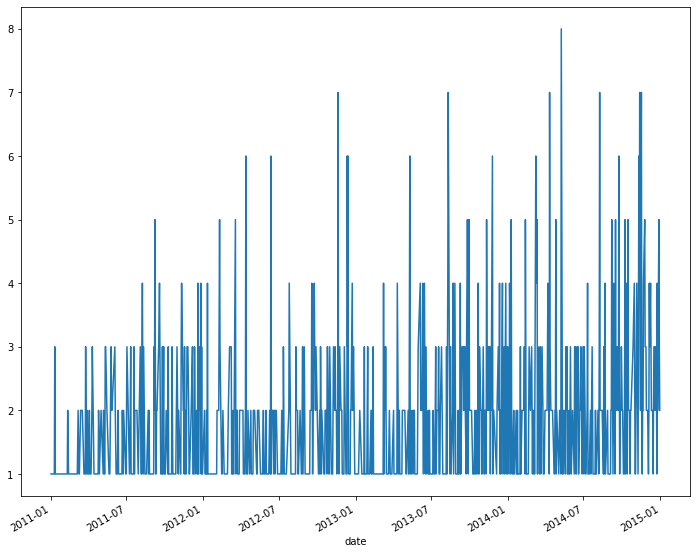

In [9]:
df.groupby("date")['Order ID'].nunique().plot(figsize = (12,10))

E os produtos por data?

<AxesSubplot:xlabel='date'>

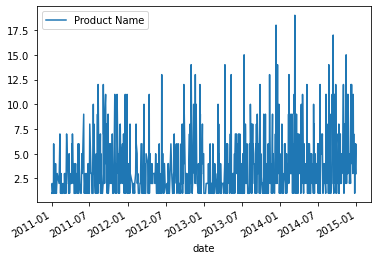

In [10]:
df.groupby("date")[['Product Name']].count().plot()

Como faríamos com o matplotlib?

In [11]:
import matplotlib.pyplot as plt

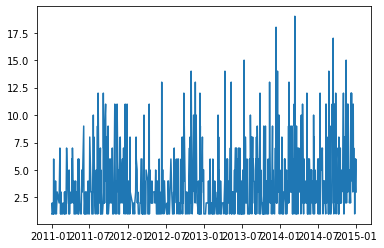

In [12]:
plt.plot(df.groupby("date")[['Product Name']].count())

O pacote já "entende" o que estamos tentando fazer se passarmos puramente o dataframe agrupado, mas também podemos querer especificar cada parâmetro separadamente.

In [13]:
df_grouped = df.groupby("date")[['Product Name']].count()
df_grouped

,Product Name
date,
2011-01-02,1
2011-01-03,1
2011-01-04,2
2011-01-07,1
2011-01-08,1
...,...
2014-12-25,6
2014-12-26,3
2014-12-29,6


In [14]:
x = list(df_grouped.index)
y = df_grouped.values

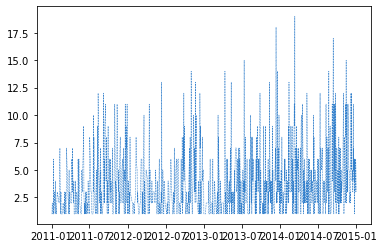

In [15]:
plt.plot(x,y, c = (0.2,0.5,0.8), linestyle = '--', linewidth = 0.5, markersize = 5)

Quais as principais diferenças no plot com os dois pacotes?

- O matplotlib produz um gráfico "menos processado" (menos personalização por padrão; por ex: não vem com legenda, nomes nos eixos etc)

[Gráfico de barras](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

Vamos plotar os estados mais lucrativos no dataset todo?

In [16]:
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,date
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,2013-06-13
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,2011-09-06
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,2011-09-06
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,2011-09-06
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,2011-09-06


<AxesSubplot:xlabel='State'>

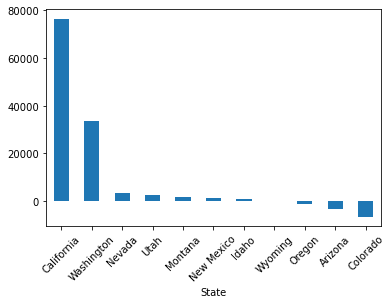

In [17]:
# Com o pandas
df.groupby("State")['Profit'].sum().sort_values(ascending = False).plot(kind = 'bar', rot = 45)

E com matplotlib?

In [18]:
df_grouped = df.groupby("State")['Profit'].sum().sort_values(ascending = False)

In [19]:
x = list(df_grouped.index)
y = df_grouped.values

<BarContainer object of 11 artists>

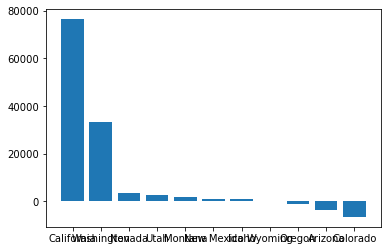

In [20]:
plt.bar(x,y,width = 0.8)

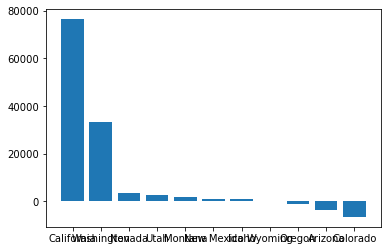

In [21]:
bars = plt.bar(x,y,width = 0.8)

In [22]:
bars

<BarContainer object of 11 artists>

Vamos colocar os rótulos nas barras?

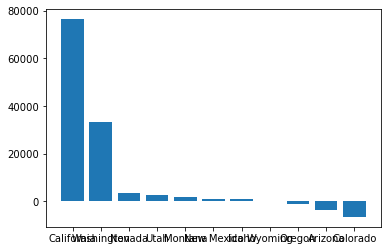

In [23]:
fig = plt.figure() # declara uma figura

bars = plt.bar(x,y)
ax = fig.get_axes()

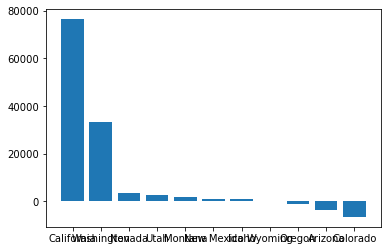

In [24]:
fig

In [25]:
ax

[<AxesSubplot:>]

[Axes.bar_label](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html)

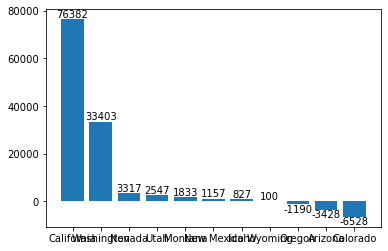

In [26]:
fig = plt.figure() # declara uma figura

bars = plt.bar(x,y) # plota o gráfico
ax = fig.get_axes() # retorna o elemento "axes"

ax[0].bar_label(bars, fmt = '%.0f');

In [27]:
bars.datavalues

array([76381.6 , 33402.7 ,  3316.76,  2546.56,  1833.32,  1157.13,
         826.73,   100.2 , -1190.48, -3427.87, -6527.86])

C:\Users\Tiago\AppData\Local\Temp/ipykernel_10972/3412796996.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels = x, rotation = 45);


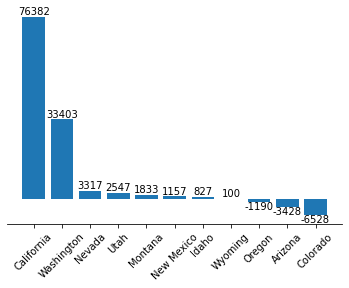

In [28]:
fig = plt.figure() # declara uma figura

bars = plt.bar(x,y) # plota o gráfico
ax = fig.get_axes() # retorna o elemento "axes"

ax[0].bar_label(bars, fmt = '%.0f')

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)

ax[0].get_yaxis().set_visible(False)

ax[0].set_xticklabels(labels = x, rotation = 45);

E se quiséssemos fazer o mesmo tipo de visão, mas uma por ano, na mesma figura?

Vamos, primeiro, pensar com "dados fictícios"

# Voltamos às 20h40

Voltando ao nosso conjunto de dados...

## Vamos, agora, "por a mão na massa"!

### Gerando algumas visualizações descritivas com matplotlib

Vamos utilizar um dataset [dos preços dos combustíveis no Brasil](https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil).

Reproduza as visualizações abaixo. Para cada uma, pense em pontos que você poderia modificar na visualização, pensando em aprimorá-la.

#### Preços médios do etanol e da gasolina, por região do Brasil

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
combustiveis = pd.read_csv('2004-2021.tsv', sep='\t')
combustiveis['DATA FINAL']=pd.to_datetime(combustiveis['DATA FINAL'])
combustiveis.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


In [96]:
combustiveis['date']= pd.to_datetime(combustiveis['DATA FINAL'])
combustiveis['date']

0        2004-05-15
1        2004-05-15
2        2004-05-15
3        2004-05-15
4        2004-05-15
            ...    
120818   2021-05-01
120819   2021-05-01
120820   2021-05-01
120821   2021-05-01
120822   2021-05-01
Name: date, Length: 120823, dtype: datetime64[ns]

In [97]:
gasolina = combustiveis[combustiveis['PRODUTO']=='GASOLINA COMUM']
grouped_gas = gasolina.groupby(['date','REGIÃO'])['PREÇO MÉDIO REVENDA'].mean()
etanol = combustiveis[combustiveis['PRODUTO']=='ETANOL HIDRATADO']
grouped_eta = etanol.groupby(['date','REGIÃO'])['PREÇO MÉDIO REVENDA'].mean()



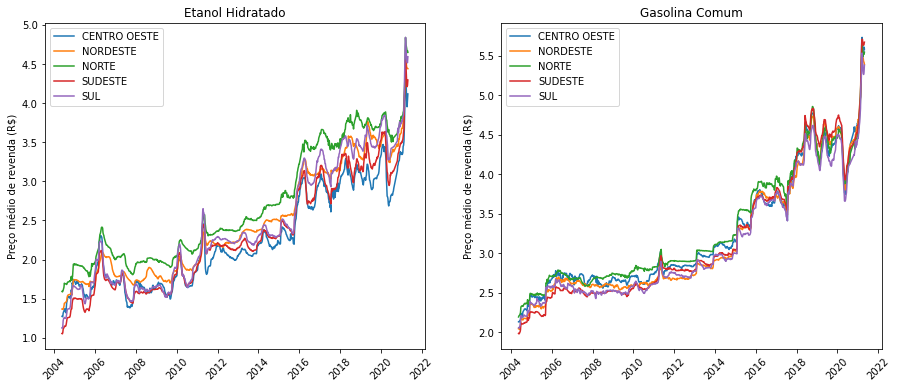

In [98]:
plt.figure(figsize = (15,6))
for region in grouped_eta.unstack().columns:
    y = grouped_eta.unstack()[region] # eixo-y
    plt.subplot(1, 2, 1)
    plt.plot(grouped_eta.unstack().index,y)

plt.legend(grouped_eta.unstack().columns)
plt.ylabel('Preço médio de revenda (R$)')
plt.title('Etanol Hidratado')
plt.xticks(rotation=45);

for region in grouped_gas.unstack().columns:
    y = grouped_gas.unstack()[region] # eixo-y
    plt.subplot(1, 2, 2)
    plt.plot(grouped_gas.unstack().index,y)

plt.legend(grouped_gas.unstack().columns)
plt.ylabel('Preço médio de revenda (R$)')
plt.title('Gasolina Comum')
plt.xticks(rotation=45);

#### Preço médio em 2020 dos preços do Etanol e da Gasolina por região

In [99]:
df_2020 = combustiveis[combustiveis['date'].dt.year==2020]
df_2020

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,date
110731,2019-12-29,2020-01-04,NORTE,ACRE,ETANOL HIDRATADO,21,R$/l,3.979,0.165,3.740,4.390,0.516,0.041,3.463,0.072,3.3169,3.4962,0.021,2020-01-04
110732,2019-12-29,2020-01-04,NORDESTE,ALAGOAS,ETANOL HIDRATADO,55,R$/l,3.356,0.325,2.995,4.400,0.415,0.097,2.941,0.123,2.75,3.1769,0.042,2020-01-04
110733,2019-12-29,2020-01-04,NORTE,AMAPA,ETANOL HIDRATADO,3,R$/l,3.710,0.053,3.670,3.770,0.286,0.014,3.424,0.05,3.3891,3.4594,0.015,2020-01-04
110734,2019-12-29,2020-01-04,NORTE,AMAZONAS,ETANOL HIDRATADO,39,R$/l,3.337,0.212,3.190,3.970,0.225,0.064,3.112,0.091,2.92,3.2499,0.029,2020-01-04
110735,2019-12-29,2020-01-04,NORDESTE,BAHIA,ETANOL HIDRATADO,330,R$/l,3.611,0.163,3.190,4.299,0.634,0.045,2.977,0.135,2.4854,3.4635,0.045,2020-01-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117624,2020-12-20,2020-12-26,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,3.927,0.127,3.660,4.130,-99999.0,0.032,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,2020-12-26
117625,2020-12-20,2020-12-26,SUL,SANTA CATARINA,OLEO DIESEL S10,68,R$/l,3.542,0.148,3.299,3.999,-99999.0,0.042,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,2020-12-26
117626,2020-12-20,2020-12-26,SUDESTE,SAO PAULO,OLEO DIESEL S10,533,R$/l,3.634,0.196,3.259,5.379,-99999.0,0.054,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,2020-12-26
117627,2020-12-20,2020-12-26,NORDESTE,SERGIPE,OLEO DIESEL S10,21,R$/l,3.897,0.114,3.690,4.090,-99999.0,0.029,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,2020-12-26


In [100]:
gas_2020 = df_2020[df_2020['PRODUTO']=='GASOLINA COMUM'].groupby('REGIÃO')['PREÇO MÉDIO REVENDA'].mean()

In [101]:
eta_2020 = df_2020[df_2020['PRODUTO']=='ETANOL HIDRATADO'].groupby('REGIÃO')['PREÇO MÉDIO REVENDA'].mean()

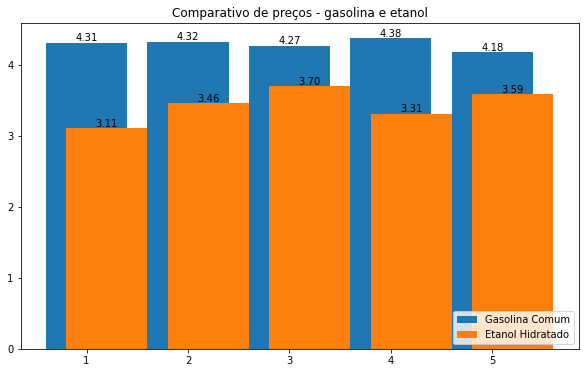

In [110]:
idx=np.array([1,2,3,4,5])
fig = plt.figure(figsize=(10,6))
bars=plt.bar(x=idx, height=gas_2020.values)
ax = fig.get_axes() # retorna o elemento "axes"

ax[0].bar_label(bars, fmt = '%.2f');
bars=plt.bar(x=idx+0.2, height=eta_2020.values)
ax = fig.get_axes() # retorna o elemento "axes"

ax[0].bar_label(bars, fmt = '%.2f');
plt.legend(['Gasolina Comum','Etanol Hidratado'],loc='lower right')
plt.title('Comparativo de preços - gasolina e etanol');

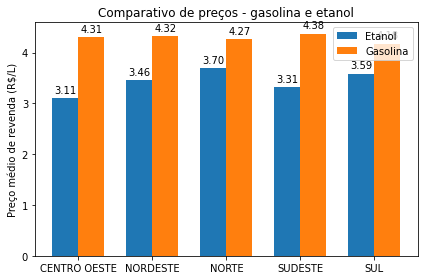

#### Total consolidado de postos para cada estado

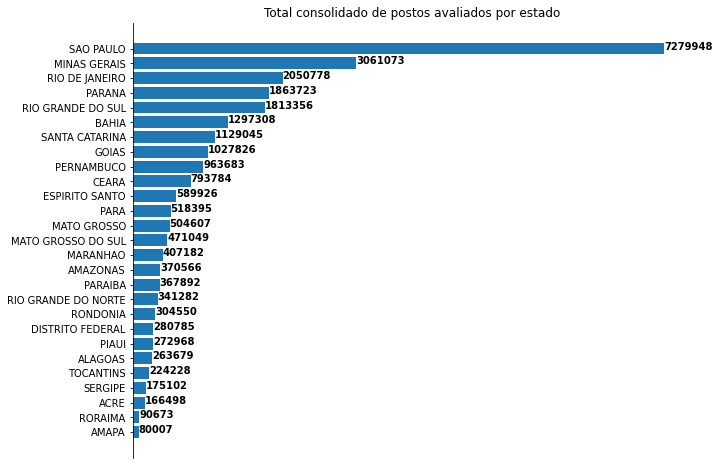

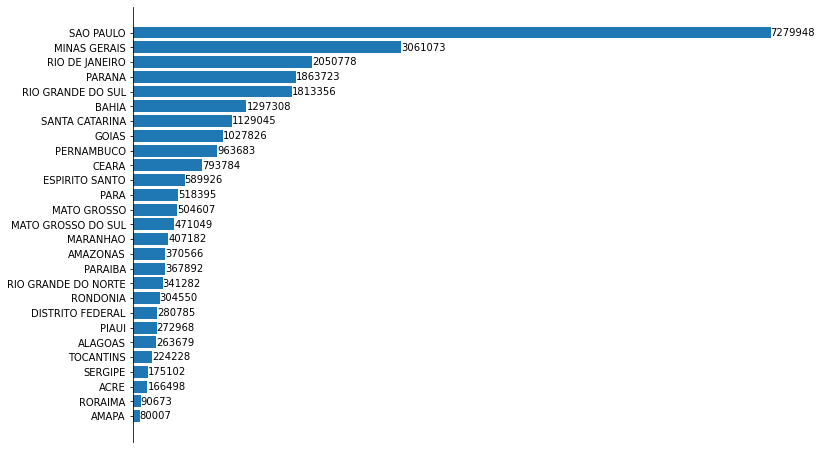

In [87]:
postos_apurados = combustiveis.groupby('ESTADO')['NÚMERO DE POSTOS PESQUISADOS'].sum().sort_values()
fig = plt.figure(figsize=(12,8))
bars=plt.barh(postos_apurados.index, postos_apurados.values)
ax = fig.get_axes() # retorna o elemento "axes"
ax[0].bar_label(bars, fmt = '%.f');
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].get_xaxis().set_visible(False)

#### Relação entre preço da gasolina e do etanol (nível Brasil)

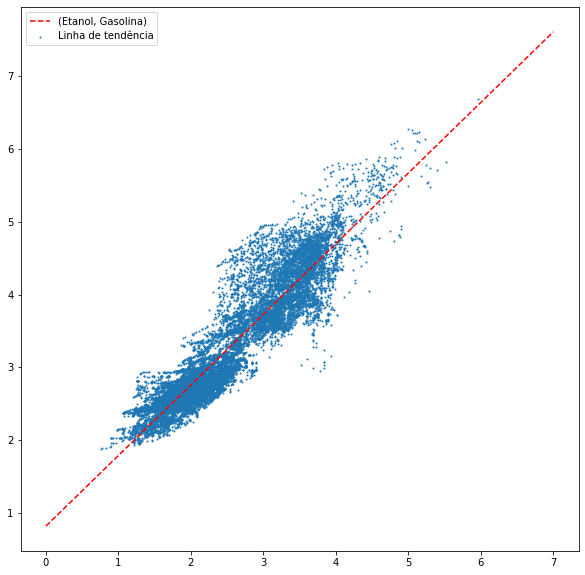

In [94]:
from scipy.stats import linregress

df = combustiveis
etanol = df[df['PRODUTO'] == 'ETANOL HIDRATADO'][['DATA FINAL', 'ESTADO', 'PREÇO MÉDIO REVENDA']]
gasolina = df[df["PRODUTO"] == 'GASOLINA COMUM'][['DATA FINAL', 'ESTADO', 'PREÇO MÉDIO REVENDA']]

gasolina = gasolina.merge(etanol, how = 'inner', on = ['DATA FINAL', 'ESTADO'])

plt.figure(figsize = (10,10))

x = gasolina['PREÇO MÉDIO REVENDA_y']
y = gasolina['PREÇO MÉDIO REVENDA_x']
plt.scatter(x = x,
            y = y,
           s = 1)
fit = linregress(x,y)

# valores quaisquer de x, dentro do intervalo do nosso plot
x_2 = np.linspace(0,7,100)
y_2 = fit[0]*x_2 + fit[1]
plt.plot(x_2, y_2, '--r')
plt.legend(['(Etanol, Gasolina)', 'Linha de tendência'])

Text(0, 0.5, 'Preço médio de revenda (gasolina)')

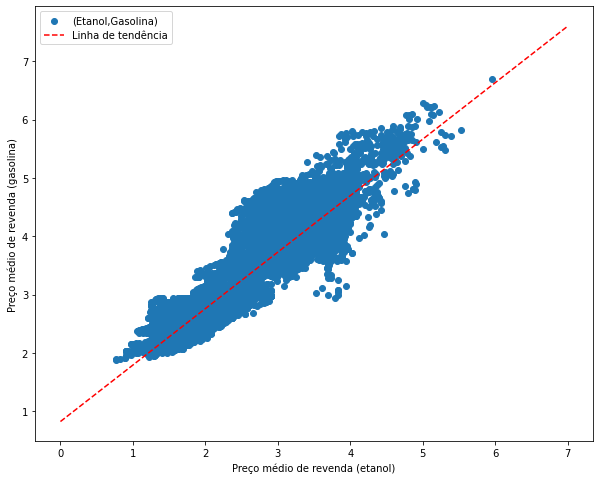